In [1]:
# enable plotting in notebook
%matplotlib notebook

# Check ensemble of water system using flat input files

## Prepare checks

Start by importing the `physical_validation` package.
Please refer to http://physical-validation.readthedocs.io/ for the full documentation.

In [2]:
import physical_validation as pv

Create a flat file parser.

In [3]:
parser = pv.data.FlatfileParser()

Our test system consists of 900 H2O molecules whose bonds are fully constrained. During the simulation, we kept the translation of the center of mass to zero, so we need to reduce the number of degrees of freedom by 3.

In [4]:
system = pv.data.SystemData(
    natoms=900*3,
    nconstraints=900*3,
    ndof_reduction_tra=3,
    ndof_reduction_rot=0
)

The physical validation tests need some information on the units that were used in the simulation. While the strings are only used for output, the conversion respective to GROMACS units are relevant for the calculations. Please see the documentation for more information.

In [5]:
units = pv.data.UnitData(
    kb=8.314462435405199e-3,
    energy_str='kJ/mol',
    energy_conversion=1.0,
    length_str='nm',
    length_conversion=1.0,
    volume_str='nm^3',
    volume_conversion=1.0,
    temperature_str='K',
    temperature_conversion=1.0,
    pressure_str='bar',
    pressure_conversion=1.0,
    time_str='ps',
    time_conversion=1.0
)

For the flat file example, we will only look at the simulations performed under NVT conditions using the velocity-rescale thermostat. There are two simulations: One ran at 300K, and one ran at 308K.

In [6]:
ensemble_1 = pv.data.EnsembleData(
    ensemble='NVT',
    natoms=900*3,
    volume=3.01125**3,
    temperature=300
)
ensemble_2 = pv.data.EnsembleData(
    ensemble='NVT',
    natoms=900*3,
    volume=3.01125**3,
    temperature=308
)
dir_1 = 'md_NVT_vr_1'
dir_2 = 'md_NVT_vr_2'

We can now read in our flat data files (1-dimensional ascii files containing energy trajectories), and create a simulation result representation usable by the physical validation tests.

In [7]:
result_1 = parser.get_simulation_data(
    units=units, ensemble=ensemble_1, system=system,
    kinetic_ene_file=dir_1 + '/kinetic_energy.dat',
    potential_ene_file=dir_1 + '/potential_energy.dat',
    total_ene_file=dir_1 + '/total_energy.dat'
)
result_2 = parser.get_simulation_data(
    units=units, ensemble=ensemble_2, system=system,
    kinetic_ene_file=dir_2 + '/kinetic_energy.dat',
    potential_ene_file=dir_2 + '/potential_energy.dat',
    total_ene_file=dir_2 + '/total_energy.dat'
)

## Run checks

As with the other parsers, we can now test, for example, the kinetic energy using the created simulation result data structure, where

* the first input is the simulation results read in,
* `strict` determines whether we test the full distribution (`True`) or only determine the mean and the variance of the distribution (`False`),
* `verbosity` sets the level of detail of the output  (with `verbosity=0` being quiet and `verbosity=3` being the most chatty),
* `filename` is being used to plot the resulting distribution for visual inspection,
* `screen=True` allows to see the plot directly on screen (or in this notebook).

==> Kinetic energy test of simulation md_NVT_vr_1
After equilibration, decorrelation and tail pruning, 97.27% (17509 frames) of original Kinetic energy remain.


<IPython.core.display.Javascript object>


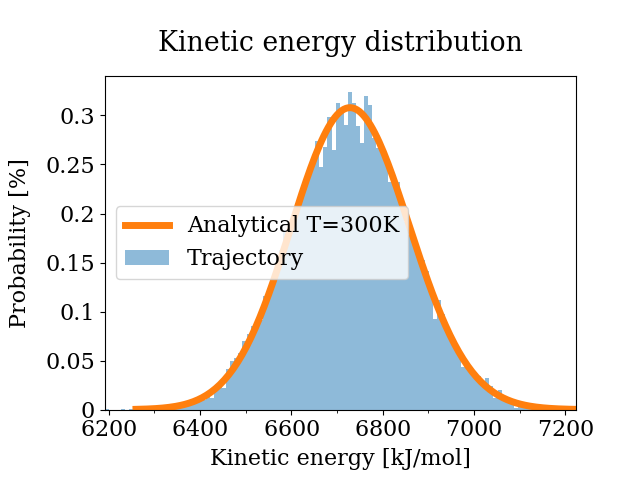

Kinetic energy distribution check (non-strict)
Analytical distribution (T=300.00 K):
 * mu: 6730.97 kJ/mol
 * sigma: 129.57 kJ/mol
Trajectory:
 * mu: 6729.71 +- 0.93 kJ/mol
   T(mu) = 299.94 +- 0.04 K
 * sigma: 130.01 +- 0.64 kJ/mol
   T(sigma) = 301.01 +- 1.49 K
==> Kinetic energy test of simulation md_NVT_vr_2
After equilibration, decorrelation and tail pruning, 90.29% (16253 frames) of original Kinetic energy remain.


<IPython.core.display.Javascript object>


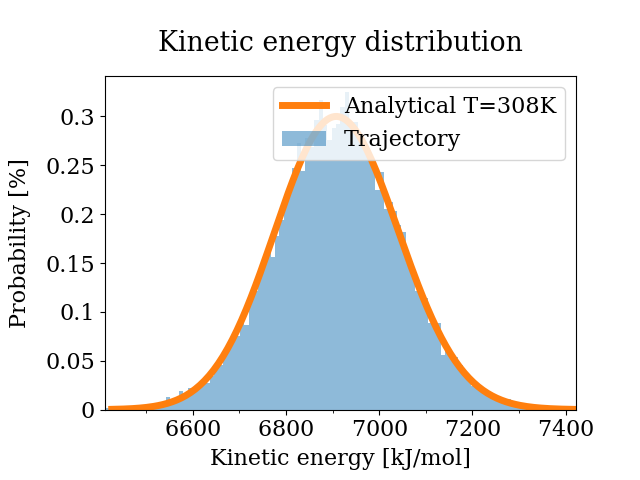

Kinetic energy distribution check (non-strict)
Analytical distribution (T=308.00 K):
 * mu: 6910.47 kJ/mol
 * sigma: 133.03 kJ/mol
Trajectory:
 * mu: 6911.29 +- 0.99 kJ/mol
   T(mu) = 308.04 +- 0.04 K
 * sigma: 133.35 +- 0.75 kJ/mol
   T(sigma) = 308.74 +- 1.75 K


(0.8323153428756876, 0.42278198744910805)

In [8]:
print('==> Kinetic energy test of simulation ' + dir_1)
pv.kinetic_energy.distribution(result_1, strict=False, verbosity=2,
                               filename='ke_flat_vr_NVT_1', screen=True)
print('==> Kinetic energy test of simulation ' + dir_2)
pv.kinetic_energy.distribution(result_2, strict=False, verbosity=2,
                               filename='ke_flat_vr_NVT_2', screen=True)

We can also test the distribution of the potential energy. While the first two inputs to the tests are the parsed simulation results, `verbosity` sets the level of detail of the output  (with `verbosity=0` being quiet and `verbosity=3` being the most chatty), `filename` is being used to plot the resulting distribution to file for visual inspection, and `screen=True` allows to see the plot directly on screen (or in this notebook).

==> Potential energy test
Analytical slope of ln(P_2(U)/P_1(U)): 0.01041319
After equilibration, decorrelation and tail pruning, 82.43% (14839 frames) of original Trajectory 1 remain.
After equilibration, decorrelation and tail pruning, 82.77% (14899 frames) of original Trajectory 2 remain.
Overlap is 89.9% of trajectory 1 and 88.0% of trajectory 2.
A rule of thumb states that a good overlap is found when dT/T = (2*kB*T)/(sig),
where sig is the standard deviation of the energy distribution.
For the current trajectories, dT = 8.0, sig1 = 175.3 and sig2 = 178.1.
According to the rule of thumb, given T1, a good dT is dT = 8.5, and
                                given T2, a good dT is dT = 8.9.
Rule of thumb estimates that dT = 8.7 would be optimal (currently, dT = 8.0)


<IPython.core.display.Javascript object>


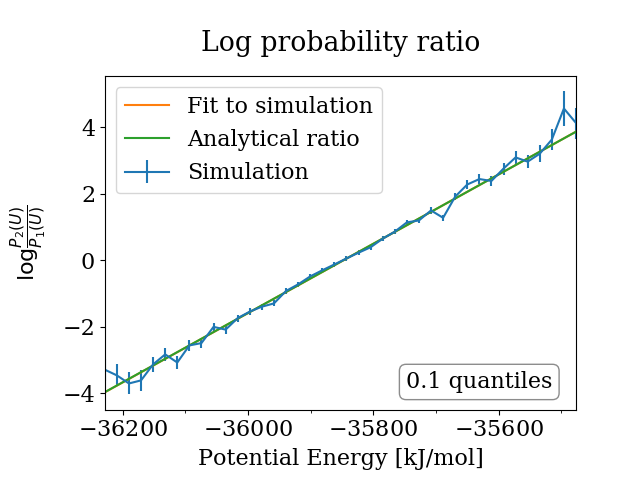

Linear Fit Analysis (analytical error)
Free energy
    373.52454 +/- 4.55809
Estimated slope                  |  True slope
    0.010420  +/- 0.000127       |  0.010413 
    (0.05 quantiles from true slope)
Estimated dT                     |  True dT
    8.0    +/- 0.1               |  8.0   
Maximum Likelihood Analysis (analytical error)
Free energy
    376.28562 +/- 4.56176
Estimated slope                  |  True slope
    0.010497  +/- 0.000127       |  0.010413 
    (0.66 quantiles from true slope)
Estimated dT                     |  True dT
    8.1    +/- 0.1               |  8.0   


[0.6607683512027682]

In [9]:
print('==> Potential energy test')
pv.ensemble.check(result_1, result_2,
                  verbosity=2, filename='pe_flat_vr_NVT', screen=True)